## <center> <font color='red'> Assignment 1: Train Gaussain Naive Bayes classifier on Iris dataset</font> </center>


In [ ]:
from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct+= 1
    return correct / float(len(actual)) * 100.0

In [ ]:
def plot_decision_boundaries(X, y,x_label,y_label,model_class,**model_params):
    
    try:
        X = np.array(X)
        y = np.array(y).flatten()
    except:
        print("Coercing input data to NumPy arrays failed")
    # Reduces to the first two columns of data
    reduced_data = X[:, :2]
    # Instantiate the model object
    model = model_class(**model_params)
    # Fits the model with the reduced data
    model.fit(reduced_data, y)

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].    

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    # Meshgrid creation
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh using the model.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])    

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predictions to obtain the classification results
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Plotting
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.xlabel(x_label,fontsize=15)
    plt.ylabel(y_label,fontsize=15)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    return plt

In [ ]:
def train_val_test_split(x,y,testRatio=0.3, valRatio=0.3, shuffle=True, random_state=42):
    np.random.seed(random_state)
    if shuffle:
        z = np.hstack((x,y.reshape((y.shape[0], 1)))) # combine the x and y to shuffle
        np.random.shuffle(z) # perform shuffling on the combined ndarray
        x = z[:,:z.shape[1]-1] # all feature columsn except the last one which is for label
        y = z[:,z.shape[1]-1] # only the last column for the label
    totalSamples = x.shape[0]
    #print("The total number of samples is {}".format(totalSamples))
    train_split = int((1-testRatio)*totalSamples) # All training data given the test split
    #print("The train split is at {}".format(train_split))
    val_split = int(valRatio * train_split) # the Validation data from training data
    #print("The validation split is at {}".format(val_split))
    return(x[val_split:train_split],y[val_split:train_split],x[:val_split],y[:val_split],x[train_split:],y[train_split:])

In [ ]:
X,Y = datasets.load_iris(return_X_y=True)

In [ ]:
xtrain,ytrain,xval,yval,xtest,ytest= train_val_test_split(X,Y,testRatio=0.2, valRatio=0.3, shuffle=True, random_state=32)

In [ ]:
print("The x_train shape is {}, y_train shape is {}, x_val shape is {}, y_val shape is {}, x_test shape is {}, y_test shape is {}".format(xtrain.shape,ytrain.shape,xval.shape,yval.shape,xtest.shape,ytest.shape))

The x_train shape is (84, 4), y_train shape is (84,), x_val shape is (36, 4), y_val shape is (36,), x_test shape is (30, 4), y_test shape is (30,)


In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [ ]:
model = GaussianNB()
model.fit(xtrain, ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
print("***Evaluating on validation data***")
expected = yval
predicted = model.predict(xval)
print("\n===============[ Confusion matrix ]===============\n")
print(metrics.confusion_matrix(expected, predicted))
print("\n===============[ Accuracy Score built-in ]===============\n")
print(metrics.accuracy_score(expected, predicted)* 100.0)
print("\n===============[ Accuracy Score Implemented ]===============\n")
print(accuracy_metric(expected, predicted))

***Evaluating on validation data***

===============[ Confusion matrix ]===============

[[15  0  0]
 [ 0 11  0]
 [ 0  1  9]]

===============[ Accuracy Score built-in ]===============

97.2222222222

===============[ Accuracy Score Implemented ]===============

97.22222222222221


In [ ]:
print("***Evaluating on test data***")
expected = ytest
predicted = model.predict(xtest)
print("\n===============[ Confusion matrix ]===============\n")
print(metrics.confusion_matrix(expected, predicted))
print("\n===============[ Accuracy Score built-in ]===============\n")
print(metrics.accuracy_score(expected, predicted)* 100.0)
print("\n===============[ Accuracy Score Implemented ]===============\n")
print(accuracy_metric(expected, predicted))

***Evaluating on test data***

===============[ Confusion matrix ]===============

[[ 9  0  0]
 [ 0 10  1]
 [ 0  1  9]]

===============[ Accuracy Score built-in ]===============

93.3333333333

===============[ Accuracy Score Implemented ]===============

93.33333333333333


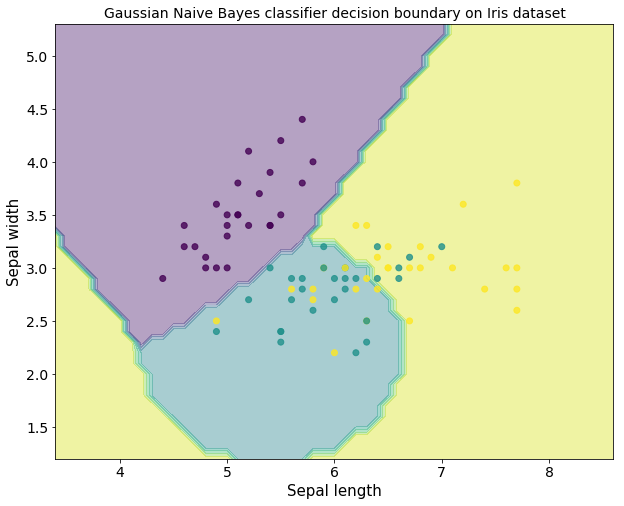

In [ ]:
# Plotting the decision boundaires ...
plt.figure(figsize=(10, 8))
plt.title("Gaussian Naive Bayes classifier decision boundary on Iris dataset",fontsize=14)
plot_decision_boundaries(xtrain,ytrain,"Sepal length","Sepal width",GaussianNB)
plt.show()